# Introduction

This dataset consists of various real-valued features computed for each cell nucleus like radius (mean of distances from center to points on the perimeter), texture (standard deviation of gray-scale values), perimeter, area, smoothness (local variation in radius lengths), compactness (perimeter^2 / area - 1.0), concavity (severity of concave portions of the contour), concave points (number of concave portions of the contour), symmetry, fractal dimension ("coastline approximation" - 1) which are used to predict diagnosis of a tumour as M(malignant)or B(benign).

Dataset link: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

Our goal is to take all the features radius, perimeter and so on in the dataset and predict whether the tumour detected on the breast is Benign or Malignant (Binary Classification problem)

# Setup

In this step we will import all the necessary packages required for this task

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data and Preprocessing

In [2]:
data = pd.read_csv('./data/breastcancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# data preprocessing
data.dropna()
data[data == '?'] = np.NaN
data.isnull().values.any()

True

In [5]:
malignant_cases = data[data['diagnosis'] == "M"] 
benign_cases = data[data['diagnosis'] == "B"] 
print("MALIGNANT CASES = " + str(len(malignant_cases)))
print("BENIGN CASES = " + str(len(benign_cases)))
print("% of Malignant cases = " + str((len(malignant_cases)/(len(malignant_cases)+len(benign_cases)))*100))

MALIGNANT CASES = 212
BENIGN CASES = 357
% of Malignant cases = 37.258347978910365


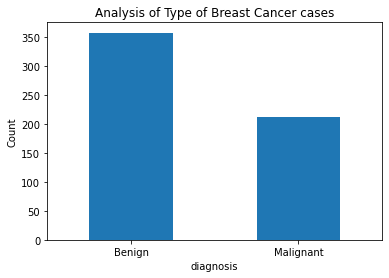

<Figure size 432x288 with 0 Axes>

In [6]:
labels = ["Benign","Malignant"]
count_classes = data.value_counts(data['diagnosis'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Analysis of Type of Breast Cancer cases")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()
plt.savefig(f"./images/BreastCancerClasses.png")

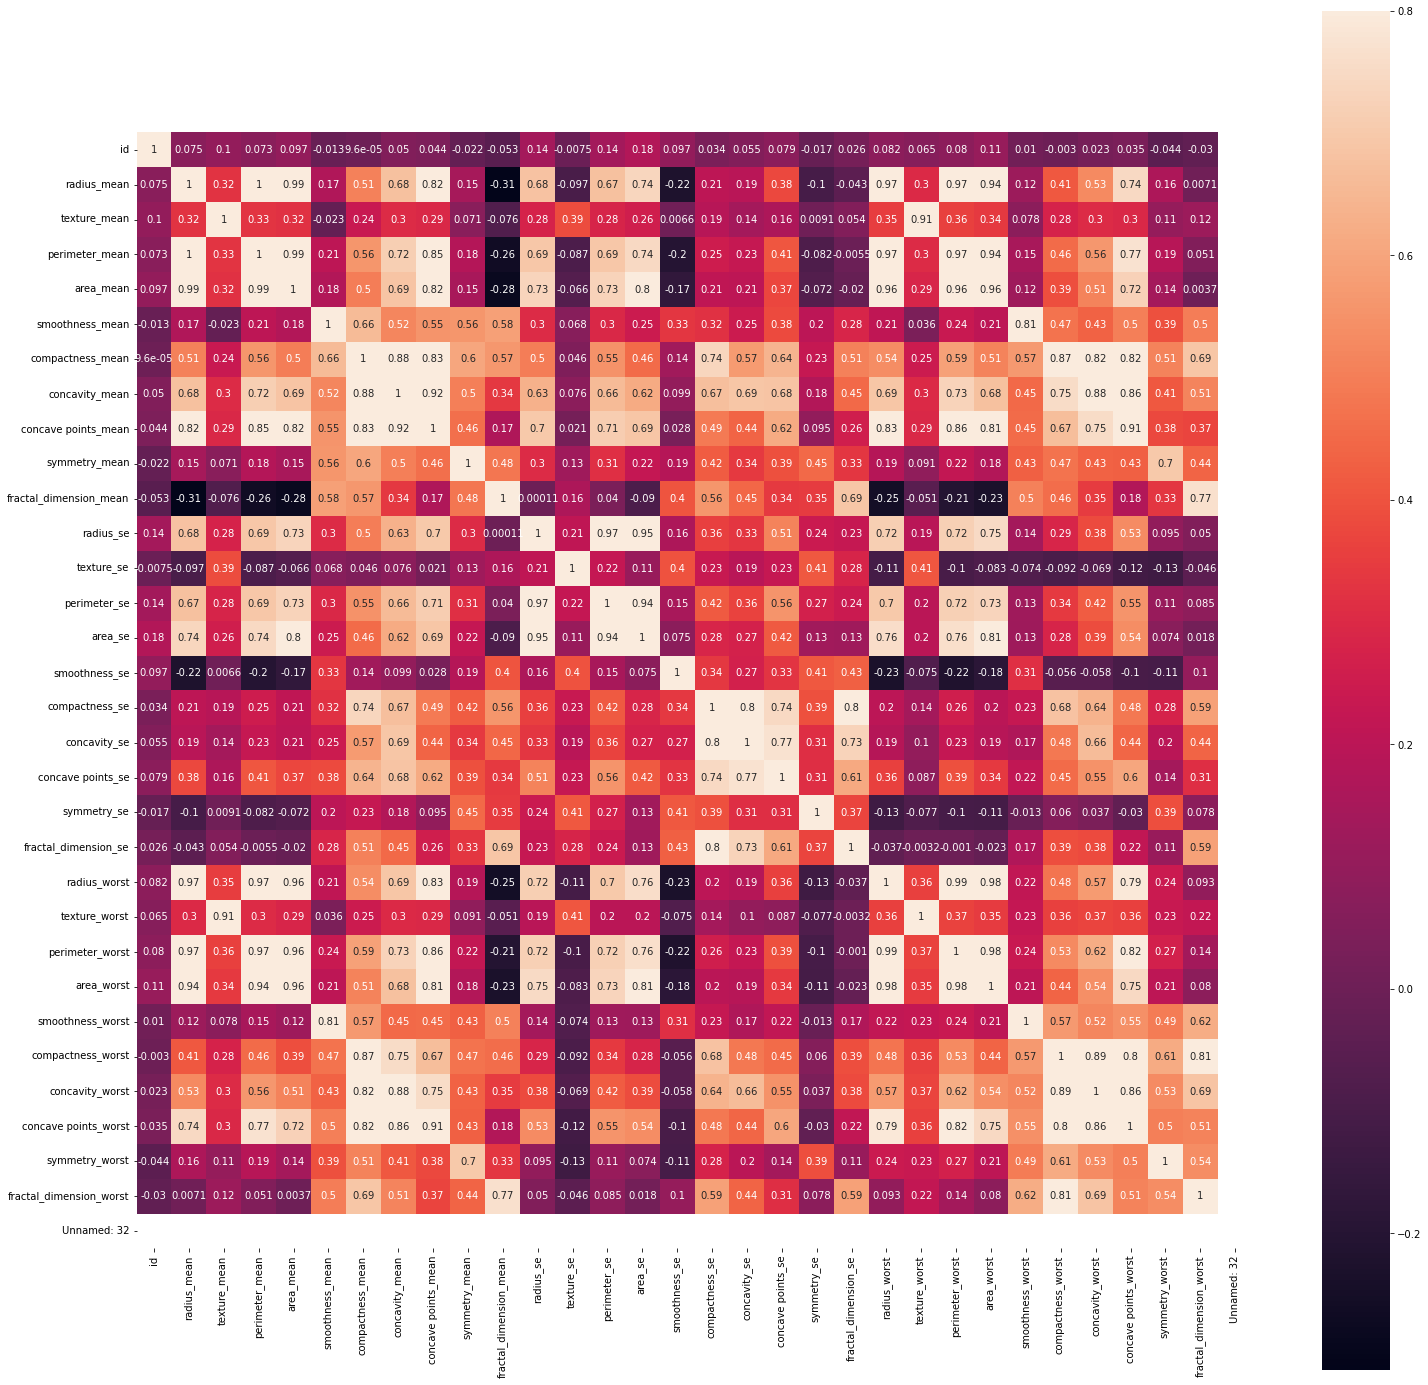

In [7]:
# plotting the correlation matrix
corrmatrix = data.corr() 
fig = plt.figure(figsize = (25, 25)) 
sns.heatmap(corrmatrix, vmax = .8, square = True,annot=True) 
plt.show() 
plt.savefig(f"./images/BreastCancerCorrelationMatrix.png")

In [8]:
# column names
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
# drop columns:  "Unnamed: 32" and "ID"
# To keep the same name of file, write: inplace=True
# Separating target from features (predictor variables)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
y = data.diagnosis     # target= M or B 

ulist = ['Unnamed: 32','id','diagnosis']
features = data.drop(ulist,axis = 1,inplace = False)

llist = ['Unnamed: 32','id']
data.drop(llist, axis = 1, inplace = True)

In [10]:
# Standardization of features
stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

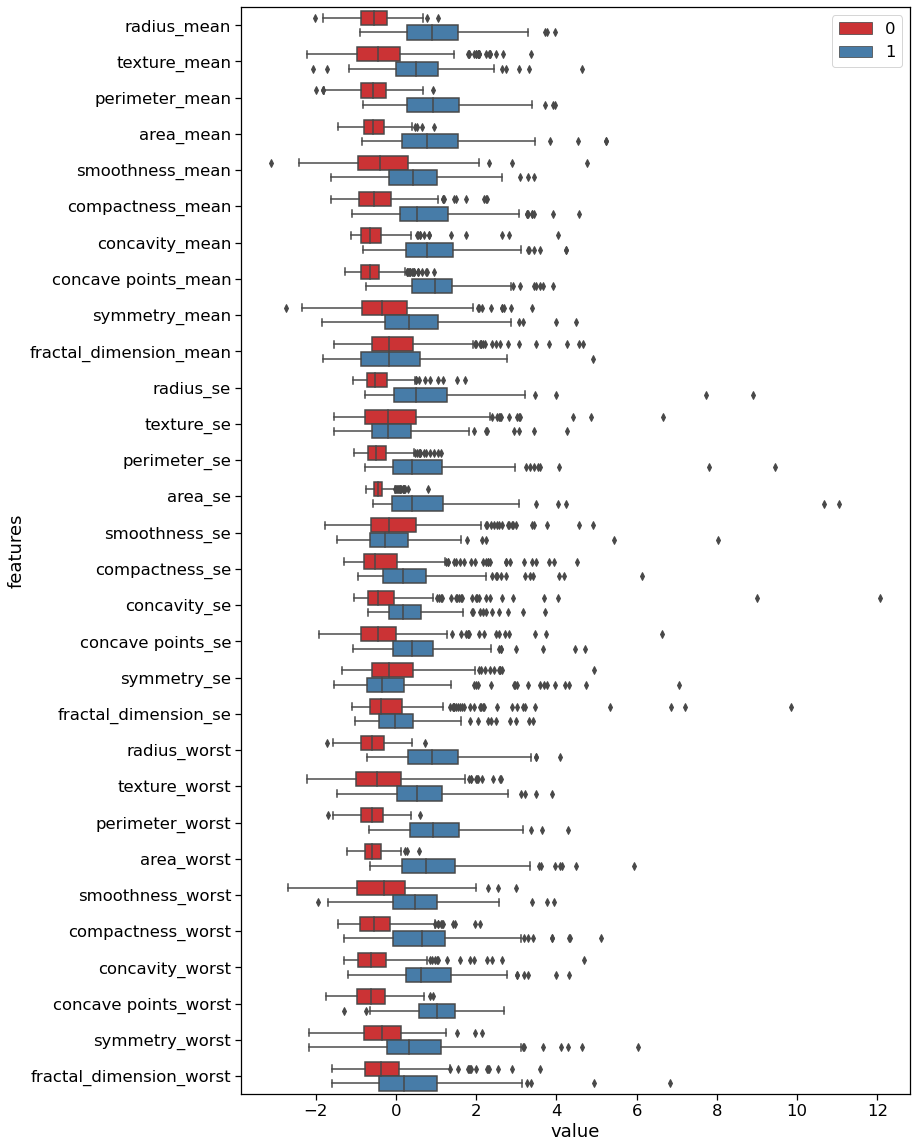

<Figure size 432x288 with 0 Axes>

In [11]:
# Boxplot of features
plt.figure(figsize=(12,20))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data_st, palette='Set1')
plt.legend(loc='best')
plt.show()
plt.savefig(f"./images/BoxPlotOfBreastCancerFeatures.png")

In [12]:
# Finding uncorrelated variables via Pearson correlation coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

r1 = pearson_r(data['radius_mean'], data['perimeter_mean'])
r2= pearson_r(data['radius_mean'], data['symmetry_mean'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(data.iloc[:,1], data.iloc[:,j])
        if abs(r) >= 0.80 and data.columns[j]  not in name_c:
                    name_c.append(data.columns[j]) 
print()
print('Length of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c)


Length of columns assuming r >=0.80: 7
name_c = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']


In [13]:
X=data[['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 
    'area_worst']]
Y=data["diagnosis"]

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

# Machine Learning

In [15]:
def evaluation_metrics(y_test, y_pred, model):
    n_errors = (y_pred != y_test).sum() 
    print("The model used is " + str(model)) 
    acc = accuracy_score(y_test, y_pred) 
    print("The accuracy is {}".format(acc)) 
    prec = precision_score(y_test, y_pred) 
    print("The precision is {}".format(prec)) 
    rec = recall_score(y_test, y_pred) 
    print("The recall is {}".format(rec)) 
    f1 = f1_score(y_test, y_pred) 
    print("The F1-Score is {}".format(f1)) 
    MCC = matthews_corrcoef(y_test, y_pred) 
    print("The Matthews correlation coefficient is {}".format(MCC)) 
    AUC = roc_auc_score(y_test, y_pred)
    print("The ROC-AUC Score is {}".format(AUC)) 

In [16]:
def plot_confusion_matrix(y_test, y_pred, model):
    class_labels = ["Benign","Malignant"] 
    conf_matrix = confusion_matrix(y_test, y_pred) 
    plt.figure(figsize =(5, 5)) 
    sns.heatmap(conf_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, fmt ="d"); 
    plt.title("Confusion matrix of " + str(model)) 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show() 
    plt.savefig(f"./images/BreastCancer_"+str(model)+".png")

The model used is DecisionTreeClassifier
The accuracy is 0.9202127659574468
The precision is 0.8461538461538461
The recall is 0.9565217391304348
The F1-Score is 0.8979591836734695
The Matthews correlation coefficient is 0.8370790552218557
The ROC-AUC Score is 0.9278407014979905


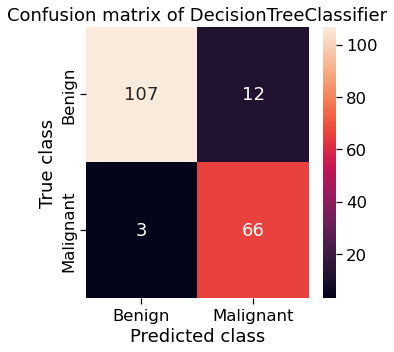

<Figure size 432x288 with 0 Axes>

In [17]:
# Decision Trees Classifier
 
dtc = DecisionTreeClassifier() 
dtc.fit(X_train, Y_train) 
dtc_Y_pred = dtc.predict(X_test) 

evaluation_metrics(Y_test,dtc_Y_pred, "DecisionTreeClassifier")
plot_confusion_matrix(Y_test,dtc_Y_pred, "DecisionTreeClassifier")

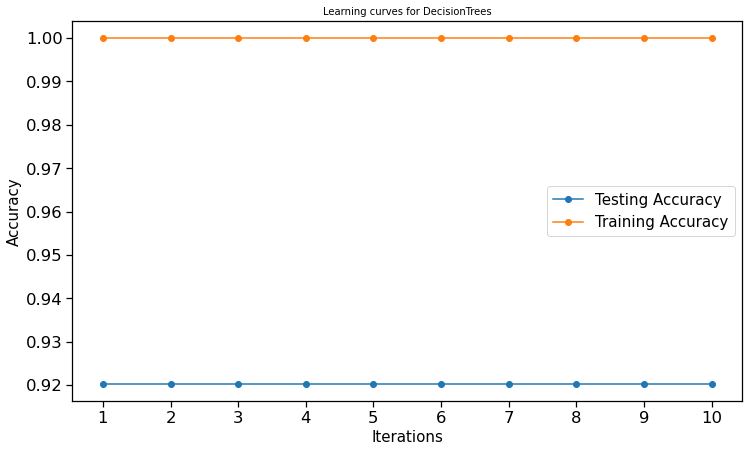

<Figure size 432x288 with 0 Axes>

In [32]:
n = np.arange(1, 11)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

# Loop over different values of k
for i, k in enumerate(n):
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = model.score(X_train, Y_train)
    test_accuracy[i] = model.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for DecisionTrees', size=10)
plt.plot(n, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(n, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Iterations', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(n), max(n)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancer_DecisionTree_AccCurve.png")

The model used is RandomForestClassifier
The accuracy is 0.9414893617021277
The precision is 0.9027777777777778
The recall is 0.9420289855072463
The F1-Score is 0.9219858156028369
The Matthews correlation coefficient is 0.8757185040982468
The ROC-AUC Score is 0.9416027280477408


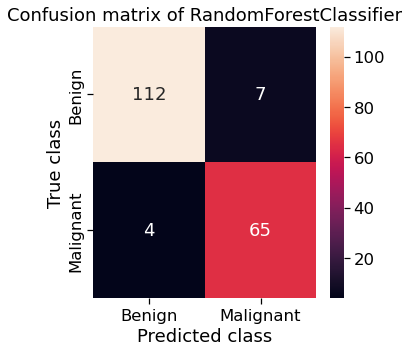

<Figure size 432x288 with 0 Axes>

In [18]:
# Random Forest Classifier
 
rfc = RandomForestClassifier() 
rfc.fit(X_train, Y_train) 
rfc_Y_pred = rfc.predict(X_test) 

evaluation_metrics(Y_test,rfc_Y_pred, "RandomForestClassifier")
plot_confusion_matrix(Y_test,rfc_Y_pred, "RandomForestClassifier")

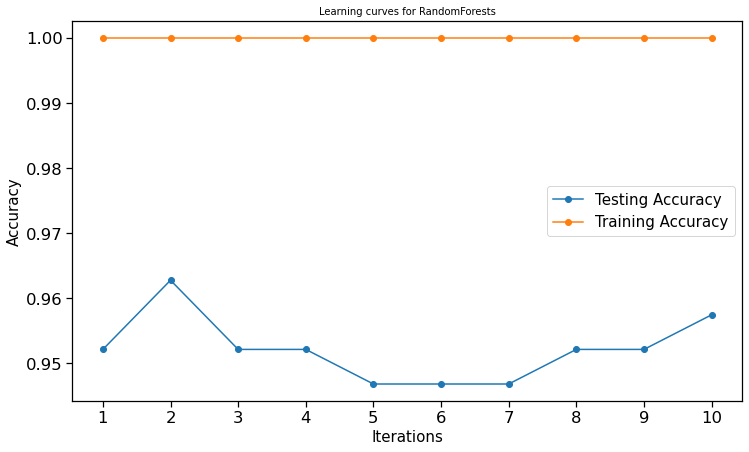

<Figure size 432x288 with 0 Axes>

In [33]:
n = np.arange(1, 11)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

# Loop over different values of k
for i, k in enumerate(n):
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = model.score(X_train, Y_train)
    test_accuracy[i] = model.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for RandomForests', size=10)
plt.plot(n, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(n, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Iterations', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(n), max(n)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancer_RandomForests_AccCurve.png")

The model used is KNearestNeighborClassification
The accuracy is 0.9468085106382979
The precision is 0.9154929577464789
The recall is 0.9420289855072463
The F1-Score is 0.9285714285714286
The Matthews correlation coefficient is 0.8864418992229618
The ROC-AUC Score is 0.9458044087200097


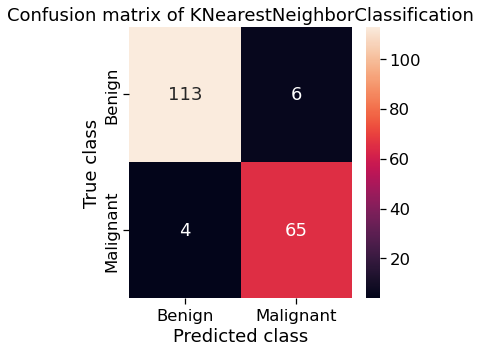

<Figure size 432x288 with 0 Axes>

In [19]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test) 

evaluation_metrics(Y_test,knn_Y_pred, "KNearestNeighborClassification")
plot_confusion_matrix(Y_test,knn_Y_pred, "KNearestNeighborClassification")

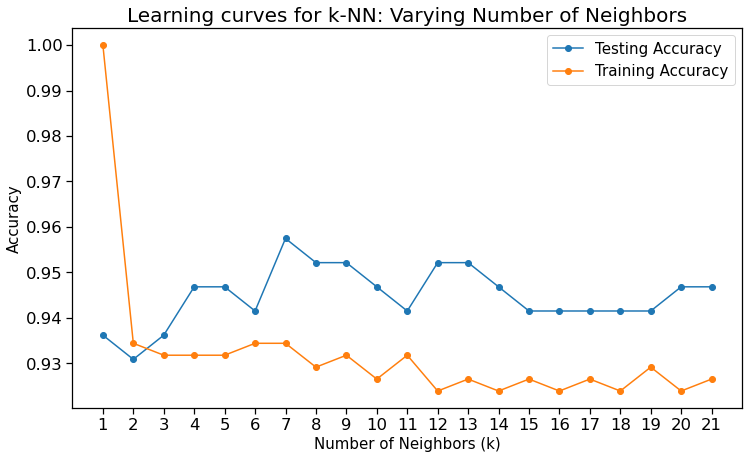

<Figure size 432x288 with 0 Axes>

In [20]:
neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for k-NN: Varying Number of Neighbors', size=20)
plt.plot(neighbors, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Number of Neighbors (k)', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancerKNNAccCurve.png")

The model used is LinearSVCClassification
The accuracy is 0.925531914893617
The precision is 0.9230769230769231
The recall is 0.8695652173913043
The F1-Score is 0.8955223880597014
The Matthews correlation coefficient is 0.8386527993665397
The ROC-AUC Score is 0.9137742053343075


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


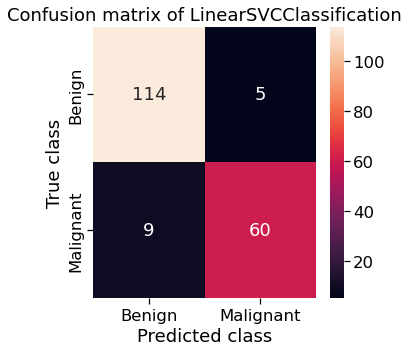

<Figure size 432x288 with 0 Axes>

In [21]:
# Linear Kernel SVM
from sklearn.svm import LinearSVC
lsvc = LinearSVC(loss='hinge', dual=True)
lsvc.fit(X_train, Y_train)
lsvc_Y_pred = lsvc.predict(X_test) 

evaluation_metrics(Y_test,lsvc_Y_pred, "LinearSVCClassification")
plot_confusion_matrix(Y_test,lsvc_Y_pred, "LinearSVCClassification")

/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

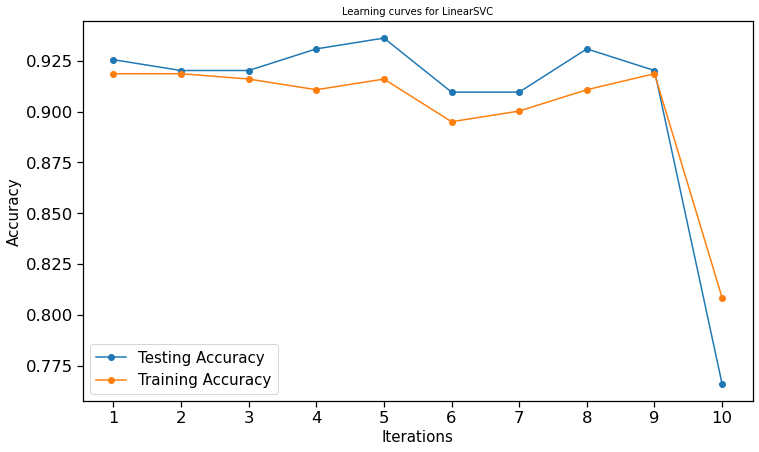

<Figure size 432x288 with 0 Axes>

In [34]:
n = np.arange(1, 11)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

# Loop over different values of k
for i, k in enumerate(n):
    model = LinearSVC(loss='hinge', dual=True)
    model.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = model.score(X_train, Y_train)
    test_accuracy[i] = model.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for LinearSVC', size=10)
plt.plot(n, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(n, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Iterations', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(n), max(n)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancer_LinearSVC_AccCurve.png")

The model used is SupportVectorClassificationWithPolyKernel
The accuracy is 0.9627659574468085
The precision is 0.9305555555555556
The recall is 0.9710144927536232
The F1-Score is 0.9503546099290779
The Matthews correlation coefficient is 0.921122552297494
The ROC-AUC Score is 0.9644988430154671


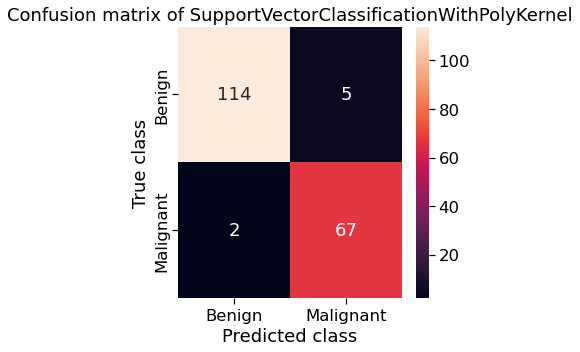

<Figure size 432x288 with 0 Axes>

In [22]:
# Polynomial Kernel SVM
svc1 = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
svc1.fit(X_train, Y_train)
svc1_Y_pred = svc1.predict(X_test)
evaluation_metrics(Y_test,svc1_Y_pred, "SupportVectorClassificationWithPolyKernel")
plot_confusion_matrix(Y_test,svc1_Y_pred, "SupportVectorClassificationWithPolyKernel")

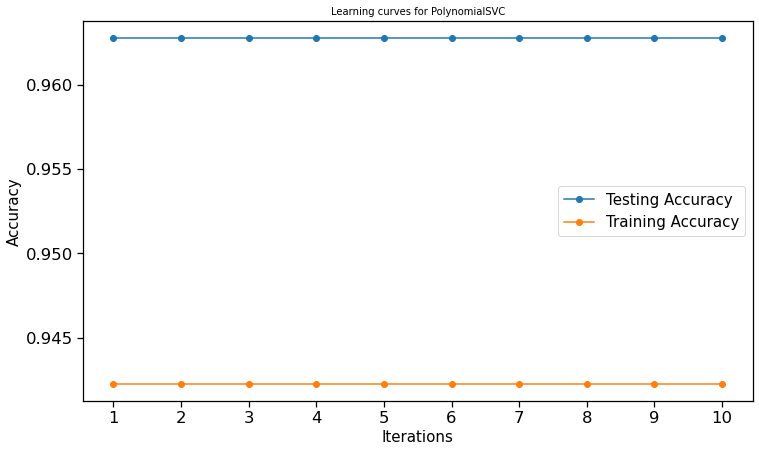

<Figure size 432x288 with 0 Axes>

In [35]:
n = np.arange(1, 11)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

# Loop over different values of k
for i, k in enumerate(n):
    model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
    model.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = model.score(X_train, Y_train)
    test_accuracy[i] = model.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for PolynomialSVC', size=10)
plt.plot(n, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(n, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Iterations', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(n), max(n)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancer_PolynomialSVC_AccCurve.png")

The model used is SupportVectorClassificationWithRbfKernel
The accuracy is 0.6329787234042553
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0
The ROC-AUC Score is 0.5


/Users/sravya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


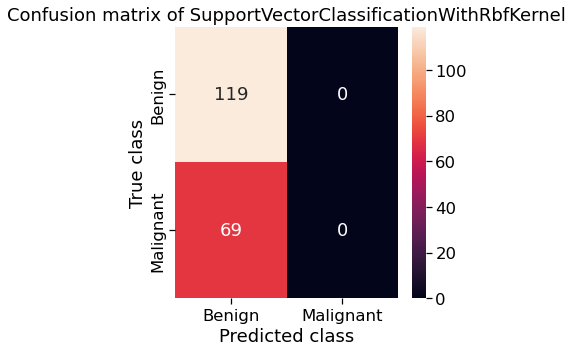

<Figure size 432x288 with 0 Axes>

In [23]:
# Radial Kernel SVM
svc2 = SVC(kernel='rbf', gamma=0.5, C=0.1)
svc2.fit(X_train, Y_train)
svc2_Y_pred = svc2.predict(X_test)
evaluation_metrics(Y_test,svc2_Y_pred, "SupportVectorClassificationWithRbfKernel")
plot_confusion_matrix(Y_test,svc2_Y_pred, "SupportVectorClassificationWithRbfKernel")

The model used is SupportVectorClassificationWithLinearKernel
The accuracy is 0.9468085106382979
The precision is 0.9154929577464789
The recall is 0.9420289855072463
The F1-Score is 0.9285714285714286
The Matthews correlation coefficient is 0.8864418992229618
The ROC-AUC Score is 0.9458044087200097


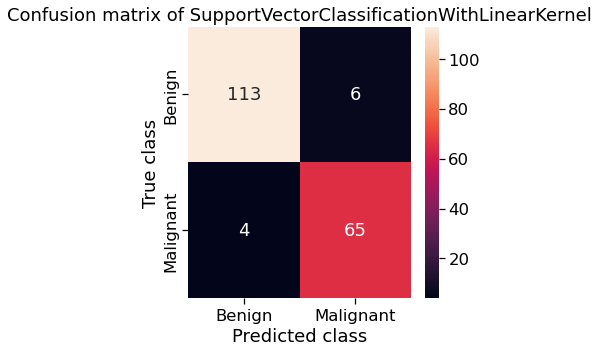

<Figure size 432x288 with 0 Axes>

In [24]:
# Linear Kernel SVM
svc3 = SVC(random_state=42, kernel='linear')
svc3.fit(X_train, Y_train)
svc3_Y_pred = svc3.predict(X_test)
evaluation_metrics(Y_test,svc3_Y_pred, "SupportVectorClassificationWithLinearKernel")
plot_confusion_matrix(Y_test,svc3_Y_pred, "SupportVectorClassificationWithLinearKernel")

The model used is SupportVectorClassificationWithSigmoidKernel
The accuracy is 0.42021276595744683
The precision is 0.06521739130434782
The recall is 0.043478260869565216
The F1-Score is 0.05217391304347826
The Matthews correlation coefficient is -0.3563849808373368
The ROC-AUC Score is 0.34106686152721954


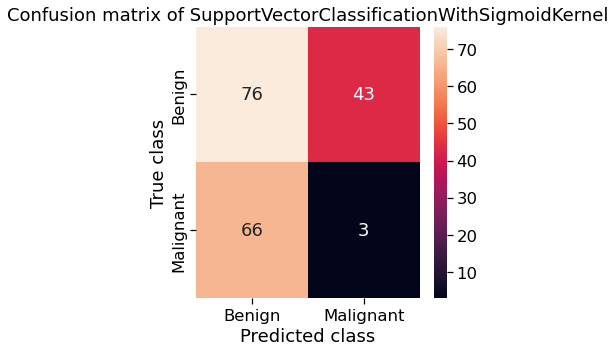

<Figure size 432x288 with 0 Axes>

In [25]:
# Sigmoid Kernel SVM
svc4 = SVC(random_state=42, kernel='sigmoid')
svc4.fit(X_train, Y_train)
svc4_Y_pred = svc4.predict(X_test)
evaluation_metrics(Y_test,svc4_Y_pred, "SupportVectorClassificationWithSigmoidKernel")
plot_confusion_matrix(Y_test,svc4_Y_pred, "SupportVectorClassificationWithSigmoidKernel")

The model used is AdaBoostClassification
The accuracy is 0.9521276595744681
The precision is 0.9166666666666666
The recall is 0.9565217391304348
The F1-Score is 0.9361702127659574
The Matthews correlation coefficient is 0.8984205281978704
The ROC-AUC Score is 0.9530507855316039


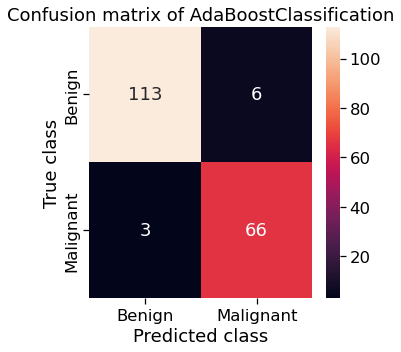

<Figure size 432x288 with 0 Axes>

In [26]:
# Boosting
adc = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)
adc.fit(X_train, Y_train)
adc_Y_pred = adc.predict(X_test) 

evaluation_metrics(Y_test,adc_Y_pred, "AdaBoostClassification")
plot_confusion_matrix(Y_test,adc_Y_pred, "AdaBoostClassification")

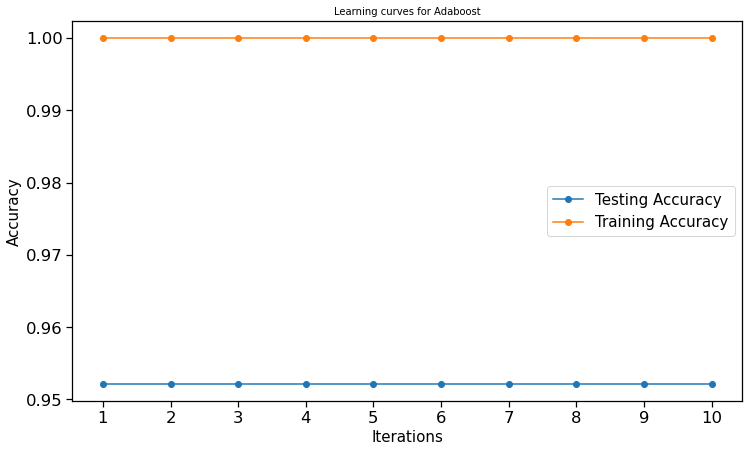

<Figure size 432x288 with 0 Axes>

In [37]:
n = np.arange(1, 11)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

# Loop over different values of k
for i, k in enumerate(n):
    model = AdaBoostClassifier(random_state=42,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=100)
    model.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = model.score(X_train, Y_train)
    test_accuracy[i] = model.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for Adaboost', size=10)
plt.plot(n, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(n, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Iterations', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(n), max(n)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancer_Adaboost_AccCurve.png")

The model used is SingleLayerPerceptronClassification
The accuracy is 0.7819148936170213
The precision is 0.6296296296296297
The recall is 0.9855072463768116
The F1-Score is 0.7683615819209041
The Matthews correlation coefficient is 0.633045962775133
The ROC-AUC Score is 0.8246863962976495


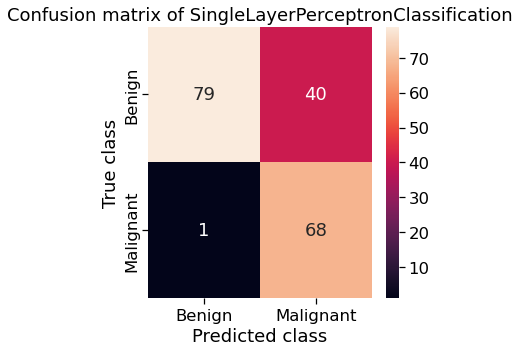

<Figure size 432x288 with 0 Axes>

In [27]:
# Single Layer Neural Network
slp = Perceptron(max_iter=300)
slp.fit(X_train, Y_train)

slp.fit(X_train, Y_train)
slp_Y_pred = slp.predict(X_test) 

evaluation_metrics(Y_test,slp_Y_pred,"SingleLayerPerceptronClassification")
plot_confusion_matrix(Y_test,slp_Y_pred,"SingleLayerPerceptronClassification")

The model used is MultiLayerPerceptronClassification
The accuracy is 0.925531914893617
The precision is 0.8873239436619719
The recall is 0.9130434782608695
The F1-Score is 0.9
The Matthews correlation coefficient is 0.8409150375773078
The ROC-AUC Score is 0.9229082937522836


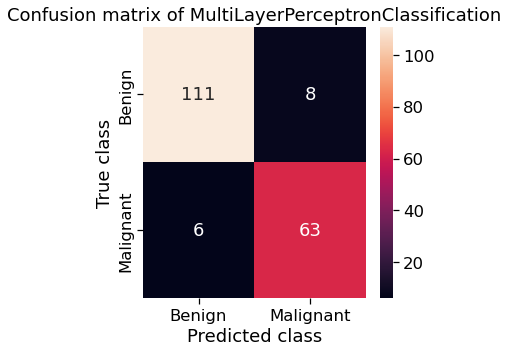

<Figure size 432x288 with 0 Axes>

In [28]:
# Multi Layer Neural Networks
mlpc = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                     max_iter=300,
                     activation = 'relu',
                     solver='adam',
                     random_state=1)
mlpc.fit(X_train, Y_train)
mlpc_Y_pred = mlpc.predict(X_test) 

evaluation_metrics(Y_test,mlpc_Y_pred,"MultiLayerPerceptronClassification")
plot_confusion_matrix(Y_test,mlpc_Y_pred,"MultiLayerPerceptronClassification")

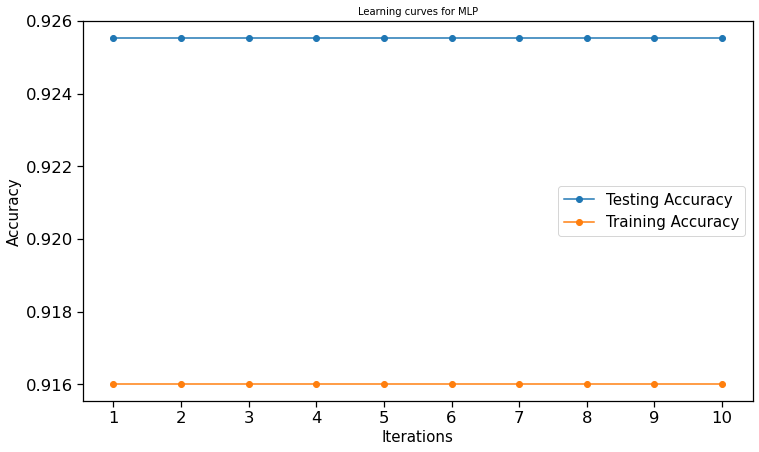

<Figure size 432x288 with 0 Axes>

In [36]:
n = np.arange(1, 11)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

# Loop over different values of k
for i, k in enumerate(n):
    model = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                     max_iter=300,
                     activation = 'relu',
                     solver='adam',
                     random_state=1)
    model.fit(X_train, Y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = model.score(X_train, Y_train)
    test_accuracy[i] = model.score(X_test, Y_test)

plt.figure(figsize=(12,7))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for MLP', size=10)
plt.plot(n, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(n, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Iterations', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(np.arange(min(n), max(n)+1, 1.0));
plt.show()
plt.savefig(f"./images/BreastCancer_MLP_AccCurve.png")

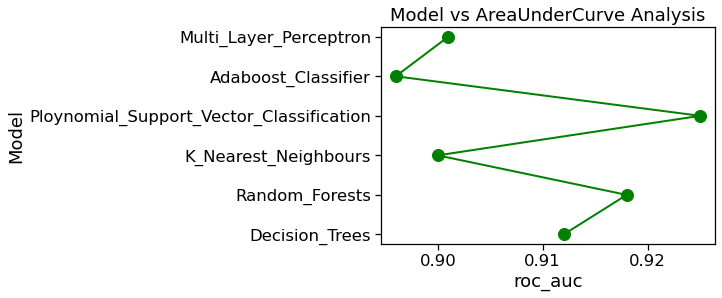

<Figure size 432x288 with 0 Axes>

In [29]:
# Comparison of area under curve metric for various models
model = ["Decision_Trees", "Random_Forests", "K_Nearest_Neighbours", "Ploynomial_Support_Vector_Classification", 
         "Adaboost_Classifier", "Multi_Layer_Perceptron"]
auc_results = [0.912,0.918,0.900,0.925,0.896,0.901]
plt.plot(auc_results,model,color='green', marker='o',linewidth=2, markersize=12)
plt.title("Model vs AreaUnderCurve Analysis")
plt.ylabel("Model")
plt.xlabel("roc_auc")
plt.show()
plt.savefig(f"./images/BreastCancer_Models_AUC.png")

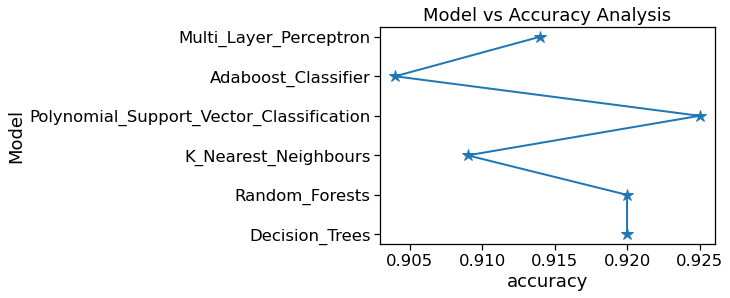

<Figure size 432x288 with 0 Axes>

In [30]:
# Comparison of accuracy metric for various models
model = ["Decision_Trees", "Random_Forests", "K_Nearest_Neighbours", "Polynomial_Support_Vector_Classification", 
         "Adaboost_Classifier", "Multi_Layer_Perceptron"]
acc_results = [0.920,0.920,0.909,0.925,0.904,0.914]
plt.plot(acc_results,model, marker='*',linewidth=2, markersize=12)
plt.title("Model vs Accuracy Analysis")
plt.ylabel("Model")
plt.xlabel("accuracy")
plt.show()
plt.savefig(f"./images/BreastCancer_Models_Accuracy.png")

In [31]:
# generate submission file
submission = pd.DataFrame({
        "id": np.arange(0, len(X_test)) + 1,
        "diagnosis": svc1_Y_pred
    })
submission.to_csv('submission_breastcancer.csv', index=False)